In [1]:
import sys
import os
import math
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

# SEABORN & MATPLOTLIBN CONFIGURATION
# seaborn styles (choose by changing index at end)
context=['paper', 'notebook', 'talk', 'poster'] [1]
palette=['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind', 'hls', 'tab10'] [2]
style=['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] [4] 

# extra customizations
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
# uncomment this to get list of all rc-params: 
#print(plt.rcParams.keys())
rc={"axes.grid":"false", #"true",
    "axes.grid.which": "major",
    "grid.color":'lightgrey',
    "grid.linewidth":0.6,
    'xtick.direction':'in',
    'xtick.top':True,
    'ytick.direction':'in',
    'ytick.right':True
    }

sns.set_theme(style=style,context=context, palette=palette,
              font_scale=1, rc=rc)
print(sys.version)
print("Seaborn version {}".format(sns.__version__))

3.9.8 (main, Nov 10 2021, 09:21:22) 
[Clang 13.0.0 (clang-1300.0.29.3)]
Seaborn version 0.12.2


### Fourier derivative example

In [2]:
def u0(x):
    u=np.exp(-2*(np.cos(x)+1))
    return u

def du0(x):
    du=2*np.sin(x)*np.exp(-2*(np.cos(x)+1))
    return du

In [3]:
def SAVE(fig,ax0,ax1,name):
    ax0.legend();
    ax1.legend(loc='upper left')
    ax0.set_ylim(-0.9,1.1)
    ax1.set_ylim(-1.2e-6, 1.2e-6 )
    fig.tight_layout()
    fig.savefig(name)

In [4]:
def RealToFourier(u):
    """Given data u, at uniformly distributed grid-points
    0<=x<2pi, calculates Fourier coefficients A[k] such that

    u = 0.5*A[0] + Sum_k(  A[k].real * cos(k x)
                         - A[k].imag * sin(k x)
                        )

    returns complex array A
    """
    A=np.fft.rfft(u)
    A *= (2./len(u))
    return A 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


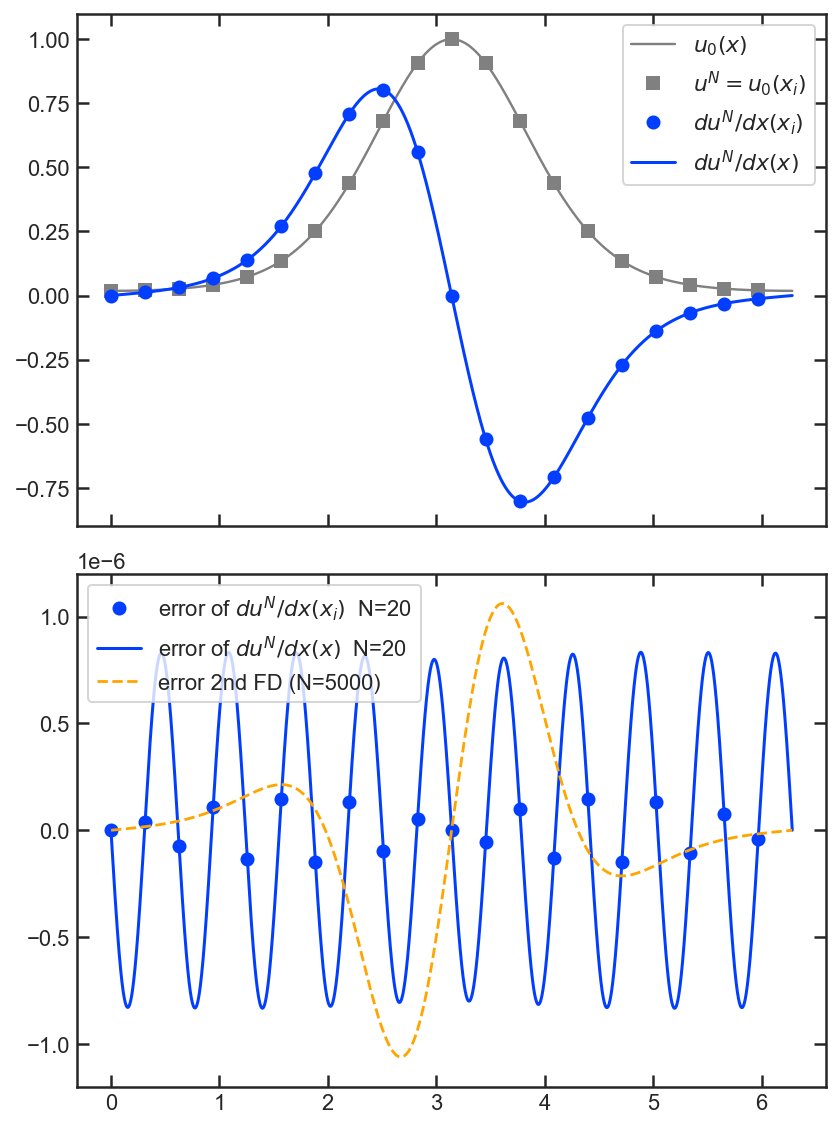

In [5]:
# Fourier Derivative example
# 
# This cell calculates incremental
# pdf-figures for use in keynote.

fig, (ax0,ax1)=plt.subplots(2,1,sharex=True, figsize=(6,8))

# INIT:  'spectral' grid
N=20
x=np.linspace(0, 2*np.pi, num=N, endpoint=False)

# INIT:  fine grid for plotting & FD derivatives
xfine=np.linspace(0, 2*np.pi, 5000)

ax0.plot(xfine, u0(xfine), lw=1.2, c='grey', label="$u_0(x)$")
ax0.plot(x,     u0(x),     's',    c='grey', label="$u^N=u_0(x_i)$")
SAVE(fig,ax0,ax1,"SpectralDeriv1.pdf")

# DIFFERENTIATION
ucoef = RealToFourier(u0(x))
k=np.arange(N/2+1,dtype=float)  # note N/2+1 -- complex coef array is shorter
ducoef = 1j*k*ucoef

# sum up series for derivative
duNdx = 0.5*np.ones(N)*np.real(ducoef[0])
for j in range(1,int(N/2)+1):
    duNdx += np.real(ducoef[j] * np.exp(1j*j*x))
ax0.plot(x, duNdx,        'o', c='b', label='$du^N/dx(x_i)$');
ax1.plot(x, duNdx-du0(x), 'o', c='b', label=f'error of $du^N/dx(x_i)$  N={N}')
SAVE(fig,ax0,ax1,"SpectralDeriv2.pdf")

# INTERPOLATION:  sum up spectal series on fine grid
duNfine=  0*xfine + 0.5*np.real(ducoef[0])
for j in range(1,int(N/2)+1):
    duNfine += np.real(ducoef[j] * np.exp(1j*j*xfine))
ax0.plot(xfine, duNfine, lw=1.5, c='b', label='$du^N/dx(x)$');
SAVE(fig,ax0,ax1,"SpectralDeriv3.pdf")

ax1.plot(xfine, duNfine-du0(xfine), lw=1.5, c='b', label=f'error of $du^N/dx(x)$  N={N}')
SAVE(fig,ax0,ax1,"SpectralDeriv4.pdf")

# FINITE-DIFFERENCE DERIVATIVE
ufine=u0(xfine)
du_FD = (ufine[2:]-ufine[:-2])/(xfine[2]-xfine[0])
ax1.plot(xfine[1:-1], du_FD-du0(xfine[1:-1]), 
         '--', lw=1.4, color='orange', label="error 2nd FD (N=5000)")
SAVE(fig,ax0,ax1,"SpectralDeriv5.pdf")

### Spectral coefficient convergence example

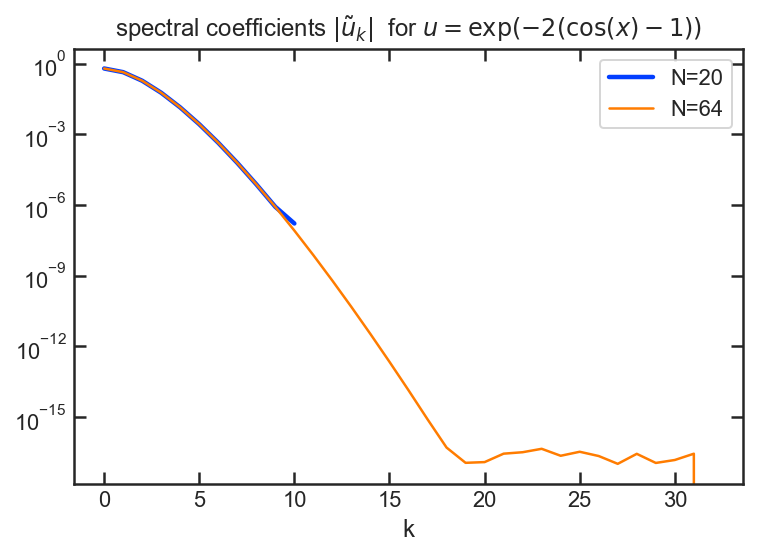

In [6]:
for N in 20,64:
    x=np.linspace(0, 2*np.pi, num=N, endpoint=False)
    ucoef=RealToFourier(u0(x))
    plt.semilogy(np.abs(ucoef), lw=10/N**0.5, label=f"N={N}")
plt.xlabel('k')
plt.title('spectral coefficients $|\\tilde u_k|$  for $u=\exp(-2(\cos(x)-1))$')
plt.legend();

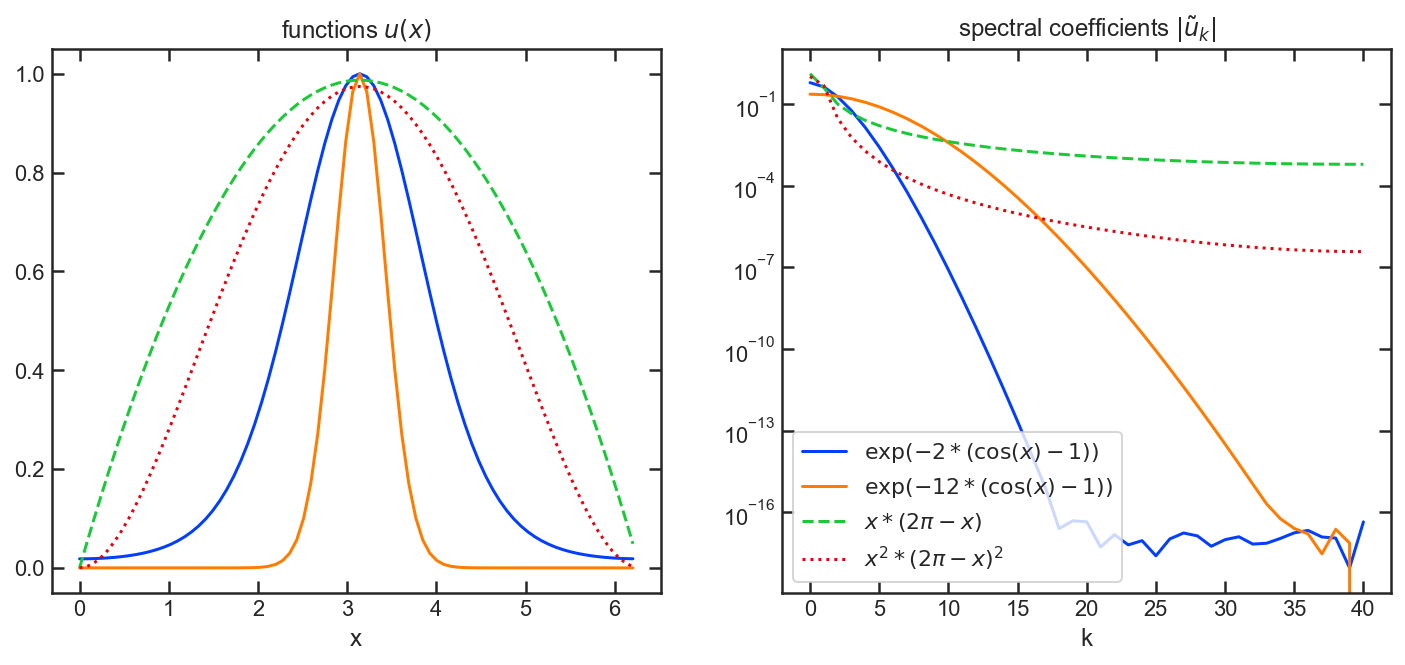

In [7]:
# Convergence of Fourier series for different functions.
#
# The important learning point is that even for smooth 
# functions with exponential convergence, the _shape_ 
# of the function determines the rate of convergence
# (see the two solid curves).
#
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(12,5))
N=80
x=np.linspace(0, 2*np.pi, num=N, endpoint=False)
u=np.exp(-2*(np.cos(x)+1))
ucoefs=RealToFourier(u)
ax0.plot(x,u,label="$\exp(-2*(\cos(x)-1))$")
ax1.semilogy(np.abs(ucoefs),label="$\exp(-2*(\cos(x)-1))$")

u=np.exp(-12*(np.cos(x)+1))
ucoefs=RealToFourier(u)
ax0.plot(x,u,label="$\exp(-12*(\cos(x)-1))$")
ax1.semilogy(np.abs(ucoefs),label="$\exp(-12*(\cos(x)-1))$")

u=x*(2*np.pi-x)/10
ucoefs=RealToFourier(u)
ax0.plot(x,u, '--', label="$x*(2\pi-x)$")
ax1.semilogy(np.abs(ucoefs), '--', label="$x*(2\pi-x)$")

u= ( x*(2*np.pi-x)/10 )**2
ucoefs=RealToFourier(u)
ax0.plot(x,u, ':', label="$x^2*(2\pi-x)^2$")
ax1.semilogy(np.abs(ucoefs),':', label="$x^2*(2\pi-x)^2$")

ax0.set_xlabel('x')
ax1.set_xlabel('k')
ax0.set_title('functions $u(x)$')
ax1.set_title('spectral coefficients $|\\tilde u_k|$')
ax1.legend(); #loc='bottom left');

In [8]:
# Two functions to supplement RealToFourier() above.
#
# The three functions RealToFourier, FourierToReal and
# dudx_Fourier encapsulate transforms and first derivatives
# on a Fourier-basis.  
#
# The two functions below were not used in the lecture,
# but rather, code was explicitly substituted into the
# examples above.  (Mostly to demonstrate how simple this
# is, and because interpolation is included in the
# functions below.)

def FourierToReal(A):
    """Given spectral coefficients A[k], reconstruct the function
   0.5*A[0] + Sum_k(  A[k].real * cos(2 pi k x)
                    - A[k].imag * sin(2 pi k x)
                   )
    """
    u = np.fft.irfft(A)
    u = u * 0.5*len(u)
    return u

def dudx_Fourier(u):
    """Compute the first derivative dudx, using Foutier spectral methods.
    Assumes data is equally spaced in interval 0<=x<2pi and
    periodic."""
    A=RealToFourier(u)
    # multiply A[k] by  j k, where j is the imagimnary unit
    k= np.linspace(0, len(A)-1, len(A))
    A *= 1j*k
    # convert back tp real-space values
    dudx=FourierToReal(A)
    return dudx